In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.append('../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


Loading config data from ini file
DataLoader type is:  <class 'omama.loaders.omama_loader.OmamaLoader'>
type of data:  <class 'omama.data.Data'>
bb: [416, 211, 471, 257]


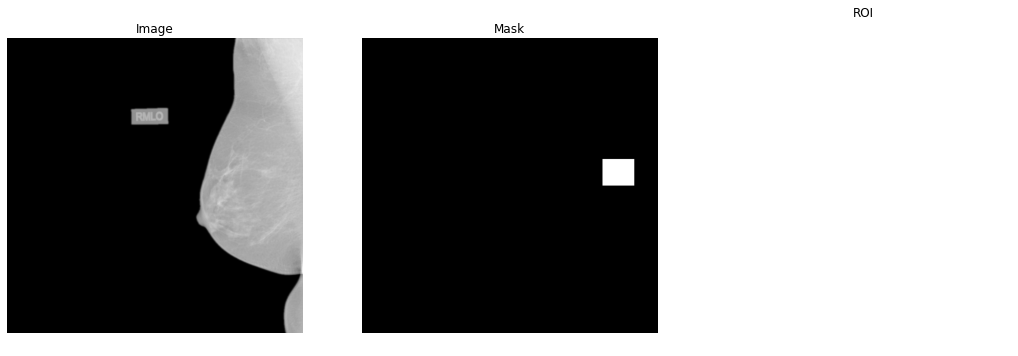

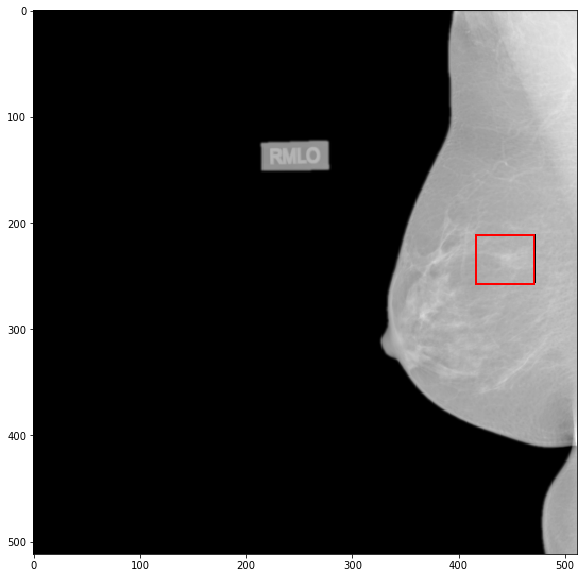

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Set the folder paths for images, masks, and JSON files
image_folder = '/raid/mpsych/OMAMA/DATA/data/test_2d_512/images'
mask_folder = '/raid/mpsych/OMAMA/DATA/data/test_2d_512/masks'
json_folder = '/raid/mpsych/OMAMA/DATA/data/test_2d_512/labels'

# List image, mask, and JSON files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.npz')])
mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith('_mask.npz')])
json_files = sorted([f for f in os.listdir(json_folder) if f.endswith('.json')])

# Load and display a pair of image and mask (adjust the index as needed)
index = 0  # change this to load a different pair

# Load the image
image_path = os.path.join(image_folder, image_files[index])
with np.load(image_path) as data:
    image = data['data']

# Load the mask
mask_path = os.path.join(mask_folder, mask_files[index])
with np.load(mask_path) as data:
    mask = data['data']

# Load bounding box coordinates from .json file
json_path = os.path.join(json_folder, json_files[index])
with open(json_path, 'r') as f:
    data = json.load(f)
    roi_coords = data['coords']

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

# Assuming O.DataHelper.view() can plot on given axis
O.DataHelper.view(image=image, roi_coords=roi_coords)
axes[2].set_title('ROI')
axes[2].axis('off')

plt.show()
